In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


In [2]:
train_activity = pd.read_csv('C:/Bigcontest/train_activity.csv')
train_label = pd.read_csv('C:/Bigcontest/train_label.csv')

In [3]:
train_duel = pd.merge(train_activity, train_label, how = 'outer', on = 'acc_id')

In [4]:
train_duel.head()

,wk,acc_id,cnt_dt,play_time,npc_exp,npc_hongmun,quest_exp,quest_hongmun,item_hongmun,game_combat_time,...,normal_chat,whisper_chat,district_chat,party_chat,guild_chat,faction_chat,cnt_use_buffitem,gathering_cnt,making_cnt,label
0,7,3dc6f2875dc6e6f35b9e2bdb25b391a8003386ff23becd...,4,2.088814,4.405057,-0.245477,4.454059,3.009797,-0.306354,1.184011,...,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,3.466939,-0.027758,-0.365536,month
1,8,3dc6f2875dc6e6f35b9e2bdb25b391a8003386ff23becd...,5,2.673460,4.760178,-0.222527,6.107479,4.758528,-0.306354,1.709534,...,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,5.070359,-0.027758,-0.365536,month
2,3,b8856358ff62e596fa07e3e40b8e7fd4b7729263c72b44...,2,-0.649522,-0.231021,-0.290803,-0.245978,-0.487666,-0.306354,-0.566706,...,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.498275,-0.027758,-0.365536,retained
3,4,b8856358ff62e596fa07e3e40b8e7fd4b7729263c72b44...,2,-0.658235,-0.231874,-0.290803,-0.250423,-0.487666,-0.306354,-0.569842,...,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.503692,-0.027758,-0.365536,retained
4,5,b8856358ff62e596fa07e3e40b8e7fd4b7729263c72b44...,4,-0.654734,-0.231874,-0.290803,-0.250423,-0.487666,-0.306354,-0.569842,...,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.503692,-0.027758,-0.365536,retained


In [5]:
train_duel_win = train_duel[['acc_id','duel_win','label']]

In [6]:
train_duel_win.head()

,acc_id,duel_win,label
0,3dc6f2875dc6e6f35b9e2bdb25b391a8003386ff23becd...,-0.041326,month
1,3dc6f2875dc6e6f35b9e2bdb25b391a8003386ff23becd...,-0.041326,month
2,b8856358ff62e596fa07e3e40b8e7fd4b7729263c72b44...,-0.041326,retained
3,b8856358ff62e596fa07e3e40b8e7fd4b7729263c72b44...,-0.041326,retained
4,b8856358ff62e596fa07e3e40b8e7fd4b7729263c72b44...,-0.041326,retained


In [7]:
train_duel_win.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440323 entries, 0 to 440322
Data columns (total 3 columns):
acc_id      440323 non-null object
duel_win    440323 non-null float64
label       440323 non-null object
dtypes: float64(1), object(2)
memory usage: 13.4+ MB


In [8]:
train_duel_win = train_duel_win.groupby(['acc_id'], as_index = False).mean()

In [9]:
train_duel_win.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 2 columns):
acc_id      100000 non-null object
duel_win    100000 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.3+ MB


In [10]:
train_duel_win = pd.merge(train_duel_win, train_label, how = 'outer', on = 'acc_id')

In [11]:
train_duel_win.head()

,acc_id,duel_win,label
0,0000264b01392acfde44f9d8494f112a701dc5d3e5fda6...,-0.041326,week
1,0001f130e89288ff0df167b998f6eb7085687f411fcb72...,-0.041326,retained
2,00028f0ad71c07f48aef465fd0c98ba6e3f0f3de3d2f7d...,-0.041326,retained
3,00036e5b6a197c196fa10fc0ad4e2853b22294dff64d27...,-0.041326,month
4,00037fe8e712041a476b8b1b827583cbc34895844057f0...,-0.041326,2month


In [12]:
train_duel_win['label'].value_counts()

month       25000
week        25000
retained    25000
2month      25000
Name: label, dtype: int64

In [13]:
train_duel_win = train_duel_win[train_duel_win['duel_win'] >= -0.040]

In [14]:
train_duel_win.head()

,acc_id,duel_win,label
20,000c7d37960d5261d7680320227e07e53580f654cf0322...,0.446173,retained
24,000f75da470b53684a56be7c49083451cfa58db4573900...,-0.035076,retained
32,001a711324abb3f8c487779f6be2cdc052918390eba1b6...,1.821169,retained
39,001ed54e52274af3df2789074a12e1548c6d8b01b358eb...,6.483657,retained
60,002dadfab4581c8bc6d48c5405a24e3280f0230249962c...,0.196174,retained


In [15]:
train_duel_win.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7603 entries, 20 to 99981
Data columns (total 3 columns):
acc_id      7603 non-null object
duel_win    7603 non-null float64
label       7603 non-null object
dtypes: float64(1), object(2)
memory usage: 237.6+ KB


In [16]:
train_duel_win['label'].value_counts()

retained    6004
2month       683
month        488
week         428
Name: label, dtype: int64

In [17]:
mapping = {'week':0, 'month':1, '2month':2, 'retained':3}

In [18]:
train_duel_win['label'] = train_duel_win['label'].map(mapping)

In [19]:
train_duel_win.head()

,acc_id,duel_win,label
20,000c7d37960d5261d7680320227e07e53580f654cf0322...,0.446173,3
24,000f75da470b53684a56be7c49083451cfa58db4573900...,-0.035076,3
32,001a711324abb3f8c487779f6be2cdc052918390eba1b6...,1.821169,3
39,001ed54e52274af3df2789074a12e1548c6d8b01b358eb...,6.483657,3
60,002dadfab4581c8bc6d48c5405a24e3280f0230249962c...,0.196174,3


In [20]:
train_duel_win.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7603 entries, 20 to 99981
Data columns (total 3 columns):
acc_id      7603 non-null object
duel_win    7603 non-null float64
label       7603 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 237.6+ KB


In [30]:
train_duel_win['duel_win'].max()

180.3082065960915

# Scatter

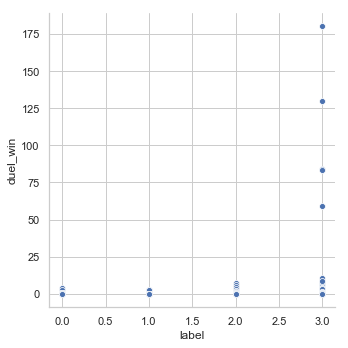

In [32]:
sns.relplot(x='label', y = 'duel_win', data=train_duel_win)

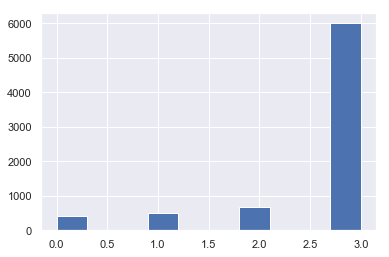

In [24]:
plt.hist(train_duel_win['label'])
plt.show()

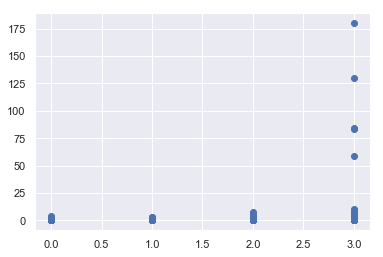

In [25]:
plt.scatter(train_duel_win['label'],train_duel_win['duel_win'])
plt.show()

# Categorical scatterplots

In [49]:
sns.set(style="ticks", color_codes=True)

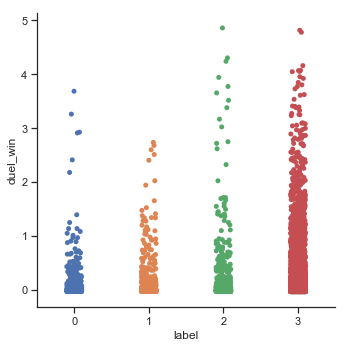

In [70]:
sns.catplot(x = 'label', y = 'duel_win', data=train_duel_win.query('duel_win < 5'))

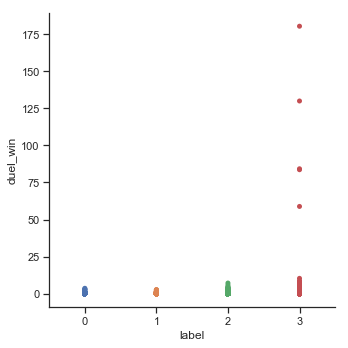

In [51]:
sns.catplot(x = 'label', y = 'duel_win',jitter = False, data=train_duel_win)

### 'Swarm' just for small data

In [52]:
#sns.catplot(x = 'label', y = 'duel_win',kind = 'swarm', data=train_duel_win)

In [53]:
# ax = sns.swarmplot(x='label', y='duel_win', data=train_duel_win, color='.25')

# Box plot

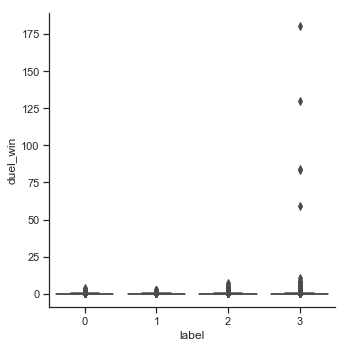

In [63]:
sns.catplot(x='label', y='duel_win', kind='box', data=train_duel_win)

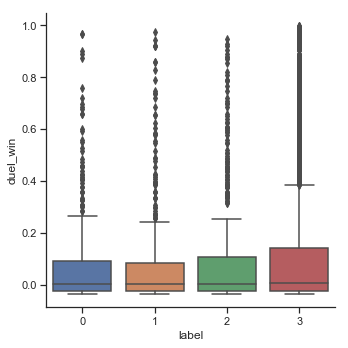

In [66]:
sns.catplot(x='label', y='duel_win', kind='box', data=train_duel_win.query('duel_win < 1'))

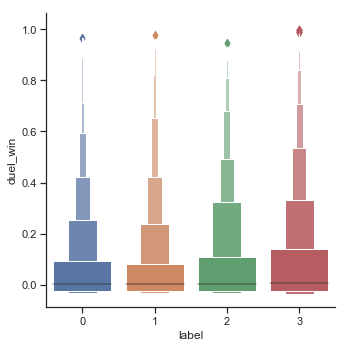

In [67]:
sns.catplot(x='label', y='duel_win', kind='boxen', data=train_duel_win.query('duel_win <1'))

In [29]:
sns.__version__

'0.9.0'